USED CAR PRICE PREDICTION-- DECISION TREE REGRESSOR

In [ ]:
#1. importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
#2.Importing the dataset
df = pd.read_csv('/content/car_data.csv')

#Perform Data Analysis and EDA

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
df.ndim

2

In [ ]:
df.shape

(4340, 8)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [ ]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [ ]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [ ]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

#ENCODERS

Two types:
1.One hot Encoders
2.Lable Encoders


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [ ]:
#create a column no_of_years = currentyear - year
currentyear = 2024
values =currentyear- df.year
print(values)

0       17
1       17
2       12
3        7
4       10
        ..
4335    10
4336    10
4337    15
4338     8
4339     8
Name: year, Length: 4340, dtype: int64


In [ ]:
df.insert(loc=2,column='no_of_years',value=values)

In [ ]:
df.columns

Index(['name', 'year', 'no_of_years', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [ ]:
#Drop columns name, year
df.drop(['name','year'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['no_of_years', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
#Rename selling_price to current_selling_price
df.rename(columns={'selling_price': 'current_selling_price'}, inplace=True)

In [ ]:
df.columns

Index(['no_of_years', 'current_selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

#Select the features and target

In [ ]:
X =np.array(df.drop('current_selling_price',axis=1))
Y =np.array(df.current_selling_price)

#Splitting the data

In [ ]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

Choosing the model

In [ ]:
regressor = DecisionTreeRegressor()

#Training the model

In [ ]:
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)

#Testing the model

In [ ]:
target = pd.DataFrame({"actual":Y_test,"Predicted":Y_pred})
regressor.predict(X_test)

array([ 150000.        ,  280000.        ,  120000.        ,
        450000.        , 1150000.        ,  280000.        ,
        530000.        ,   92800.        ,  449666.66666667,
        240000.        ,  543000.        ,  545000.        ,
        350000.        ,   50000.        ,  315000.        ,
        491666.66666667,  624000.        , 1750000.        ,
        144500.        ,  675000.        ,  635454.27272727,
        957777.77777778,  395000.        , 1050000.        ,
        285000.        ,  535714.28571429,  550000.        ,
        360000.        ,  349000.        ,  425000.        ,
        250000.        , 1225000.        ,  675000.        ,
        750000.        ,  575000.        ,  254000.        ,
       1121250.        ,  435000.        ,  177282.        ,
        360000.        ,  917500.        ,  360000.        ,
        736666.58333333,  120000.        ,  181250.        ,
        275000.        ,  280000.        ,  200000.        ,
        765000.        ,

In [ ]:
target.head()

,actual,Predicted
0,165000,150000.0
1,250000,280000.0
2,120000,120000.0
3,450000,450000.0
4,730000,1150000.0


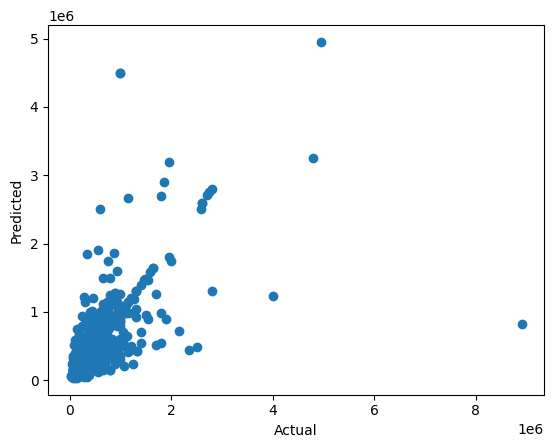

In [ ]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Performance of the model / Accuracy

In [ ]:
print("Model score:")
print(r2_score(Y_test,Y_pred))

Model score:
0.35150797162631964


Conclusion:  The model shows the accuracy of 35% using Decision Tree Regressor.
We can increase the accuracy of this model by using
RandomForest Regressor.